In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    
def draw_styled_landmarks(image, results):
    # Face connections
    mp_drawing.draw_landmarks(
        image, 
        results.face_landmarks, 
        mp_face_mesh.FACEMESH_TESSELATION,  # Holistic yerine FaceMesh kullanımı
        mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
    )

    # Pose connections
    mp_drawing.draw_landmarks(
        image, 
        results.pose_landmarks, 
        mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
    )

    # Left hand connections
    mp_drawing.draw_landmarks(
        image, 
        results.left_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
    )

    # Right hand connections
    mp_drawing.draw_landmarks(
        image, 
        results.right_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )

In [3]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

33


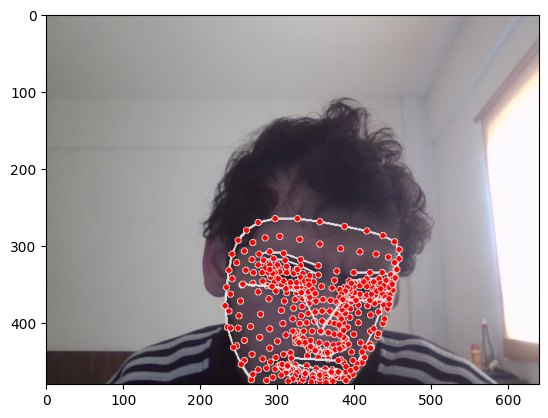

In [4]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
print(len(results.pose_landmarks.landmark))


#Extract Keypoint Values

In [6]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

result_test = extract_keypoints(results)
print(result_test)

[ 0.55740297  0.85626662 -2.28166676 ...  0.          0.
  0.        ]


In [7]:
np.save('0', result_test)

In [8]:
np.load('0.npy')

array([ 0.55740297,  0.85626662, -2.28166676, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
#DATASET            *******************************************


In [9]:
import os
import numpy as np

# Path for dataset
DATASET_PATH = os.path.join('dataset')

# Actions that we try to detect
actions = ['hello', 'thanks', 'iloveyou', 'reason', 'yes','zero','one','two','three','four','five','six','seven','eight','nine']

# Subfolders for train, validation, and test
subfolders = ['train', 'validation', 'test']

# Create dataset folder if it doesn't exist
if not os.path.exists(DATASET_PATH):
    os.makedirs(DATASET_PATH)

# Create action folders and subfolders
for subfolder in subfolders:
    for action in actions:
        action_path = os.path.join(DATASET_PATH, subfolder, action)
        if not os.path.exists(action_path):
            os.makedirs(action_path)

print("Klasörler başarıyla oluşturuldu.")


Klasörler başarıyla oluşturuldu.


In [25]:
#100 video kayıt
import os
import cv2
import mediapipe as mp
import time

# Path for videos
VIDEOS_PATH = os.path.join('videos')

# Ayarlar
fps = 15  # 15 FPS
sequence_length = fps * 2  # 2 saniye (15 FPS * 2 saniye = 30 çerçeve)

# Videolar klasörü oluştur
if not os.path.exists(VIDEOS_PATH):
    os.makedirs(VIDEOS_PATH)

# Mediapipe holistic modeli başlat
mp_holistic = mp.solutions.holistic

# Kamerayı aç
cap = cv2.VideoCapture(0)

# Kamera çözünürlüğü ayarla
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Çözünürlük bilgilerini al
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Kamera çözünürlüğü: {frame_width}x{frame_height}, FPS: {fps}")

# Mediapipe ile çalışmaya başla
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for video_num in range(1, 201):  # 100 video kaydetmek için döngü
        video_path = os.path.join(VIDEOS_PATH, f'video{video_num}.mp4')
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))

        # Geri sayımı kamerada göster
        countdown_start = time.time()
        while time.time() - countdown_start < 2:
            ret, frame = cap.read()
            if not ret:
                print("Kameradan görüntü alınamadı!")
                break

            remaining_time = int(2 - (time.time() - countdown_start))
            cv2.putText(frame, f"Recording starts in {remaining_time}", (50, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.putText(frame, f"Camera FPS: {fps}", (15, 450),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow("Webcam Feed", frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        frame_count = 0

        while frame_count < sequence_length:
            start_frame_time = time.time()

            # Kameradan görüntü al
            ret, frame = cap.read()
            if not ret:
                print("Kameradan görüntü alınamadı!")
                break

            # Mediapipe ile işleme
            image, results = frame, holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Landmarks çiz
            if results.pose_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

            if results.face_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)

            if results.left_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            if results.right_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            # Videoya kaydet
            out.write(frame)
            frame_count += 1

            # Görüntüyü ekranda göster
            cv2.putText(frame, f"Recording video{video_num} ({frame_count}/{sequence_length})", (15, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(frame, f"Camera FPS: {fps}", (15, 450),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow("Webcam Feed", frame)

            # Çerçeve işlem süresini hesapla ve bekleme ekle
            elapsed_time = time.time() - start_frame_time
            delay = max(1 / fps - elapsed_time, 0)
            time.sleep(delay)

            # Çıkış için 'q' tuşuna bas
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        out.release()

cap.release()
cv2.destroyAllWindows()


Kamera çözünürlüğü: 640x480, FPS: 15


In [8]:
cap.release()
cv2.destroyAllWindows()


In [1]:
# video to .npy

import os
import cv2
import numpy as np
import mediapipe as mp

# Paths
BASE_PATH = 'videos_for_set'  # Ana klasör
OUTPUT_PATH = 'dataset'  # Verilerin bölüneceği ana klasör

# Mediapipe Holistic modeli başlat
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Anahtar noktaları çıkarmak için bir yardımcı fonksiyon
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

# Train, validation ve test için oranlar
TRAIN_VIDEOS = list(range(1, 141))  # İlk 140 video train
VALIDATION_VIDEOS = list(range(141, 171))  # 141-170 arası validation
TEST_VIDEOS = list(range(171, 201))  # 171-200 arası test

# Dataset klasör yapısını oluştur
subfolders = ['train', 'validation', 'test']
actions = sorted(os.listdir(BASE_PATH))  # Actions, videos_for_set içindeki klasör adlarıdır

for subfolder in subfolders:
    for action in actions:
        folder_path = os.path.join(OUTPUT_PATH, subfolder, action)
        os.makedirs(folder_path, exist_ok=True)

# Videoları bölüştürme ve işlem yapma
def process_videos(action, video_range, destination):
    action_path = os.path.join(BASE_PATH, action)
    dest_path = os.path.join(OUTPUT_PATH, destination, action)

    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        for video_num in video_range:
            video_name = f"video{video_num}.mp4"
            video_path = os.path.join(action_path, video_name)

            if os.path.exists(video_path):
                cap = cv2.VideoCapture(video_path)

                # Video için bir klasör oluştur
                video_folder = os.path.join(dest_path, str(video_num))
                os.makedirs(video_folder, exist_ok=True)

                frame_num = 0

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Mediapipe ile işlem yap
                    image, results = frame, holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

                    # Anahtar noktaları çıkar
                    keypoints = extract_keypoints(results)

                    # Kaydet
                    npy_name = f"frame{frame_num}.npy"
                    npy_path = os.path.join(video_folder, npy_name)
                    np.save(npy_path, keypoints)

                    frame_num += 1

                cap.release()

# Her aksiyonu işle
for action in actions:
    # Train verileri
    process_videos(action, TRAIN_VIDEOS, 'train')

    # Validation verileri
    process_videos(action, VALIDATION_VIDEOS, 'validation')

    # Test verileri
    process_videos(action, TEST_VIDEOS, 'test')

print("Videolar başarıyla işlendi ve bölüştürüldü.")


Videolar başarıyla işlendi ve bölüştürüldü.


In [1]:
#dataset kontrol

import os
import numpy as np
from tensorflow.keras.utils import to_categorical

DATASET_PATH = 'dataset'  
sequence_length = 30  

actions = sorted(os.listdir(os.path.join(DATASET_PATH, 'train')))
print("Actions:", actions)

label_map = {label: num for num, label in enumerate(actions)}
print("Label Map:", label_map)

def load_data(subset):
    sequences, labels = [], []
    subset_path = os.path.join(DATASET_PATH, subset)
    for action in actions:
        action_path = os.path.join(subset_path, action)
        for sequence in os.listdir(action_path): 
            sequence_path = os.path.join(action_path, sequence)
            window = []
            for frame_num in range(sequence_length):
                npy_path = os.path.join(sequence_path, f"frame{frame_num}.npy")
                if os.path.exists(npy_path):  
                    res = np.load(npy_path)
                    window.append(res)
            if len(window) == sequence_length:  
                sequences.append(window)
                labels.append(label_map[action])
    return np.array(sequences), to_categorical(labels).astype(int)

X_train, y_train = load_data('train')
X_val, y_val = load_data('validation')
X_test, y_test = load_data('test')

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


Actions: ['eight', 'five', 'four', 'hello', 'iloveyou', 'nine', 'one', 'reason', 'seven', 'six', 'thanks', 'three', 'two', 'yes', 'zero']
Label Map: {'eight': 0, 'five': 1, 'four': 2, 'hello': 3, 'iloveyou': 4, 'nine': 5, 'one': 6, 'reason': 7, 'seven': 8, 'six': 9, 'thanks': 10, 'three': 11, 'two': 12, 'yes': 13, 'zero': 14}
Train shape: (2100, 30, 1629), Validation shape: (450, 30, 1629), Test shape: (450, 30, 1629)


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

# Örnek: 15 etiketin bulunduğu liste
actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]

# TensorBoard logları
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Model tanımlama
model = Sequential()
model.add(
    LSTM(64, return_sequences=True, activation='tanh', 
         input_shape=(30, 1629))  # 30: zaman adımı, 1629: feature boyutu
)
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Çıkış katmanı: 15 sınıf => len(actions) 
model.add(Dense(len(actions), activation='softmax'))

model.compile(
    optimizer=Adam(), 
    loss='categorical_crossentropy', 
    metrics=['categorical_accuracy']
)

# Eğitim
model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    callbacks=[tb_callback]
)

model.summary()
model.save('action.h5')


Epoch 1/200
66/66 [==============================] - 4s 15ms/step - loss: 2.3619 - categorical_accuracy: 0.1776
Epoch 2/200
66/66 [==============================] - 1s 15ms/step - loss: 1.9347 - categorical_accuracy: 0.2890
Epoch 3/200
66/66 [==============================] - 1s 17ms/step - loss: 1.6163 - categorical_accuracy: 0.4405
Epoch 4/200
66/66 [==============================] - 1s 18ms/step - loss: 1.5257 - categorical_accuracy: 0.4638
Epoch 5/200
66/66 [==============================] - 1s 15ms/step - loss: 1.3413 - categorical_accuracy: 0.5248
Epoch 6/200
66/66 [==============================] - 1s 14ms/step - loss: 1.2077 - categorical_accuracy: 0.5681
Epoch 7/200
66/66 [==============================] - 1s 15ms/step - loss: 1.1111 - categorical_accuracy: 0.6148
Epoch 8/200
66/66 [==============================] - 1s 15ms/step - loss: 0.9667 - categorical_accuracy: 0.6705
Epoch 9/200
66/66 [==============================] - 1s 15ms/step - loss: 0.9975 - categorical_accuracy:

In [4]:
#BUNU DULDULLA


import os
import numpy as np
import tensorflow as tf
import keras_tuner as kt  # veya from keras_tuner import RandomSearch (yeni sürümlerde)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, LSTM, Dense, Dropout, MaxPooling1D, 
    BatchNormalization, concatenate
)
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,             # DİKKAT: Tarama esnasında 3-5 gibi düşük değer uygundur (hız kazanmak için)
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,             # DİKKAT: Tarama sırasında hız için düşük tutabilirsiniz
    verbose=1
)


def build_model(hp):
    filters = hp.Choice('filters', [64, 128])
    kernel_1 = hp.Choice('kernel_1', [3, 5])
    kernel_2 = hp.Choice('kernel_2', [3, 7])
    lstm_1   = hp.Choice('lstm_1', [128, 64])
    lstm_2   = hp.Choice('lstm_2', [64, 32])
    
    dropout_conv = hp.Choice('dropout_conv', [0.2, 0.3])
    dropout_lstm = hp.Choice('dropout_lstm', [0.3, 0.4])
    dropout_dense = hp.Choice('dropout_dense', [0.4, 0.5])
    
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4])
    
    input_layer = Input(shape=(30, 1629), name='input_layer')

    # Paralel Conv1D Katmanları
    convA = Conv1D(filters=filters, kernel_size=kernel_1, activation='relu', padding='same')(input_layer)
    convB = Conv1D(filters=filters, kernel_size=kernel_2, activation='relu', padding='same')(input_layer)
    merged = concatenate([convA, convB], axis=-1)

    x = BatchNormalization()(merged)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(dropout_conv)(x)

    # Ek Conv Bloğu
    x = Conv1D(filters=filters*2, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(dropout_conv)(x)

    # LSTM Katmanları
    x = LSTM(lstm_1, return_sequences=True, activation='tanh')(x)
    x = Dropout(dropout_lstm)(x)

    x = LSTM(lstm_2, return_sequences=False, activation='tanh')(x)
    x = Dropout(dropout_lstm)(x)

    # Dense (Tam Bağlantılı) Katmanlar
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_dense)(x)

    x = Dense(64, activation='relu')(x)
    output_layer = Dense(len(actions), activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )
    return model


from keras_tuner.tuners import RandomSearch
# veya: from keras_tuner import RandomSearch  (yeni sürümde)

tuner = RandomSearch(
    build_model,
    objective='val_categorical_accuracy',
    max_trials=100,            # DİKKAT: Daha fazla denemek isterseniz arttırabilirsiniz. (Süre artar!)
    executions_per_trial=1,   # Her kombinasyon için kaç tekrar yapılacak
    directory='my_tuner_dir',
    project_name='sign_language_random_search'
)


tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,             # Tarama aşamasında kısa tutun
    batch_size=32,         # Bunu da hp.Choice ile parametreye dönüştürebilirsiniz
    callbacks=[tb_callback, early_stopping, reduce_lr],
    verbose=1
)

# EN İYİ PARAMETRE SETİ
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:", best_hp.values)


# a) En iyi hiperparametreler ile modeli inşa ediyoruz
final_model = tuner.hypermodel.build(best_hp)

# b) Daha uzun epok (ör: 50-100) ile nihai eğitim
history_final = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,    # DİKKAT: Artık final eğitimde 50-100 epoch gibi tutabilirsiniz
    batch_size=32,
    callbacks=[tb_callback, early_stopping, reduce_lr],
    verbose=1
)

# c) Model Kaydetme
final_model.save('tcn_lstm_best_model_tunerxxx.h5')
print("Nihai model kaydedildi: tcn_lstm_best_model_tuner.h5")

##############################################################################
# NELERE DİKKAT ETMELİ?
#
# 1) Epoch / Patience Değerleri
#    - Tarama aşamasında 10 epoch genelde yeterli olur; böylece hız kazanırsınız.
#    - En iyi hiperparametre seti bulunduktan sonra 50-100 epoch (veya ihtiyacınıza göre)
#      eğiterek nihai model olarak kaydedebilirsiniz.
#
# 2) max_trials Değeri
#    - "RandomSearch"te max_trials=20 ile 20 farklı kombinasyon denenir.
#    - Daha yüksek bir değer arama kalitesini artırsa da eğitim süresini uzatır.
#
# 3) En İyi Kombinasyon Bulunduğunda
#    - Tuner, “Best hyperparameters found: …” dediğinde elinizde en iyi parametre seti olacak.
#    - O parametrelerle yeni bir model (tuner.hypermodel.build(...)) oluşturup uzun epoch
#      eğiterek (ör. 50+) nihai modeli kaydedebilirsiniz.
##############################################################################


Trial 100 Complete [00h 00m 25s]
val_categorical_accuracy: 0.8666666746139526

Best val_categorical_accuracy So Far: 0.9733333587646484
Total elapsed time: 00h 43m 42s
Best hyperparameters found: {'filters': 128, 'kernel_1': 3, 'kernel_2': 3, 'lstm_1': 64, 'lstm_2': 64, 'dropout_conv': 0.3, 'dropout_lstm': 0.3, 'dropout_dense': 0.4, 'learning_rate': 0.001}
Epoch 1/200
66/66 [==============================] - 4s 25ms/step - loss: 1.9500 - categorical_accuracy: 0.4195 - val_loss: 4.0121 - val_categorical_accuracy: 0.1156 - lr: 0.0010
Epoch 2/200
66/66 [==============================] - 1s 15ms/step - loss: 0.8012 - categorical_accuracy: 0.7643 - val_loss: 7.1510 - val_categorical_accuracy: 0.0667 - lr: 0.0010
Epoch 3/200
66/66 [==============================] - 1s 15ms/step - loss: 0.5349 - categorical_accuracy: 0.8471 - val_loss: 5.9966 - val_categorical_accuracy: 0.1956 - lr: 0.0010
Epoch 4/200
66/66 [==============================] - ETA: 0s - loss: 0.3608 - categorical_accuracy: 0.90

Reloading Tuner from my_tuner_dir\sign_language_random_search\tuner0.json
Best hyperparameters found: {'filters': 128, 'kernel_1': 3, 'kernel_2': 3, 'lstm_1': 64, 'lstm_2': 64, 'dropout_conv': 0.3, 'dropout_lstm': 0.3, 'dropout_dense': 0.4, 'learning_rate': 0.001}
Epoch 1/200
66/66 [==============================] - 5s 30ms/step - loss: 2.0153 - categorical_accuracy: 0.4057 - val_loss: 4.7281 - val_categorical_accuracy: 0.0667 - lr: 0.0010
Epoch 2/200
66/66 [==============================] - 1s 15ms/step - loss: 0.8678 - categorical_accuracy: 0.7310 - val_loss: 7.9939 - val_categorical_accuracy: 0.0667 - lr: 0.0010
Epoch 3/200
66/66 [==============================] - 1s 15ms/step - loss: 0.5260 - categorical_accuracy: 0.8514 - val_loss: 4.7720 - val_categorical_accuracy: 0.2222 - lr: 0.0010
Epoch 4/200
65/66 [============================>.] - ETA: 0s - loss: 0.4028 - categorical_accuracy: 0.8803
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
66/66 [=======

<Figure size 640x480 with 0 Axes>

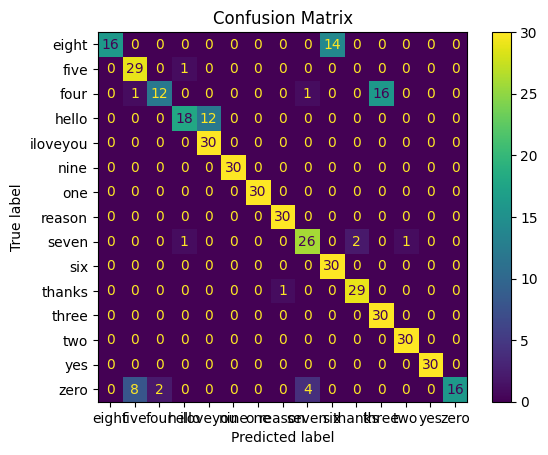

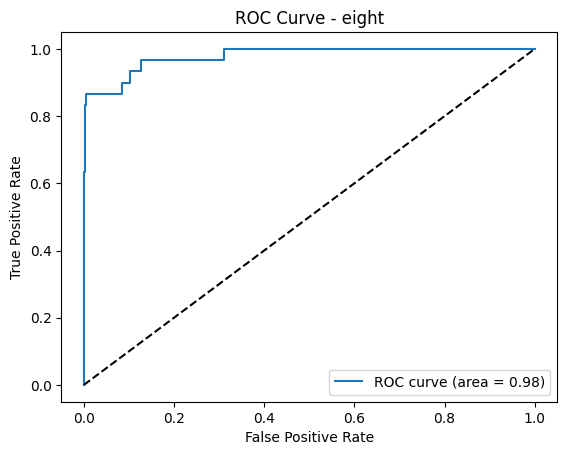

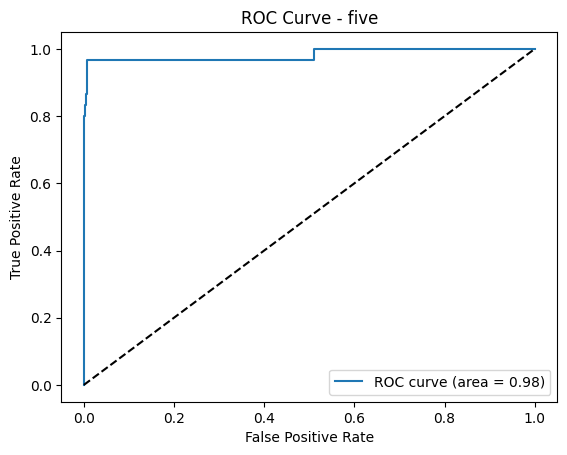

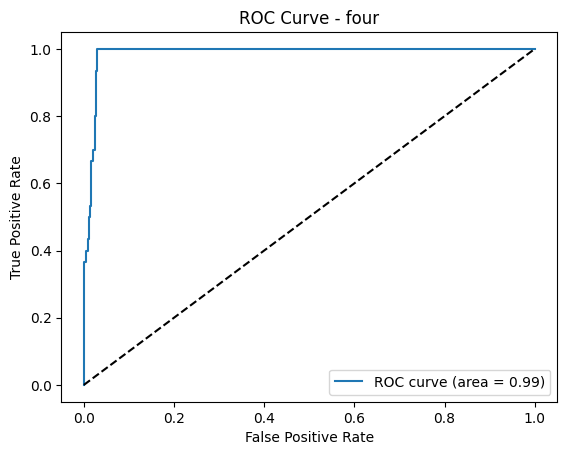

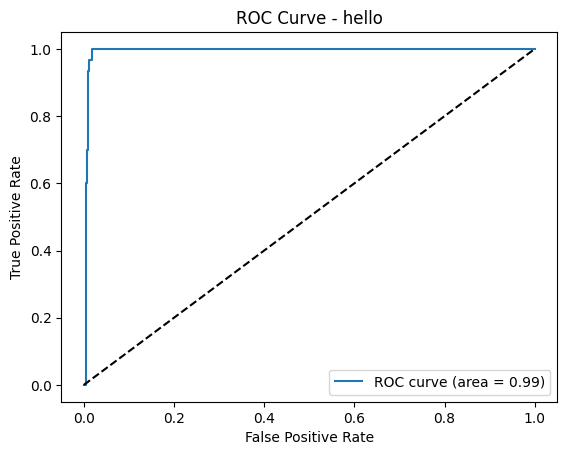

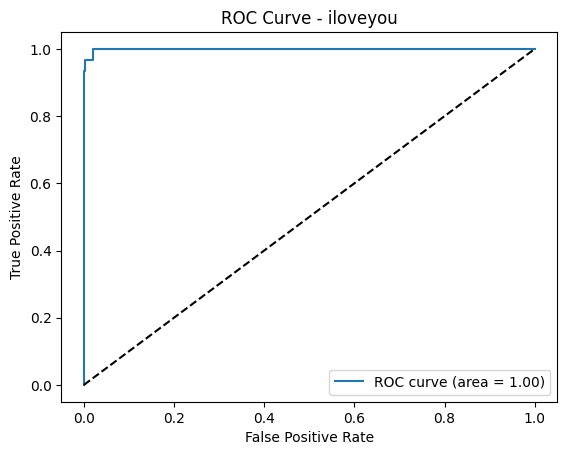

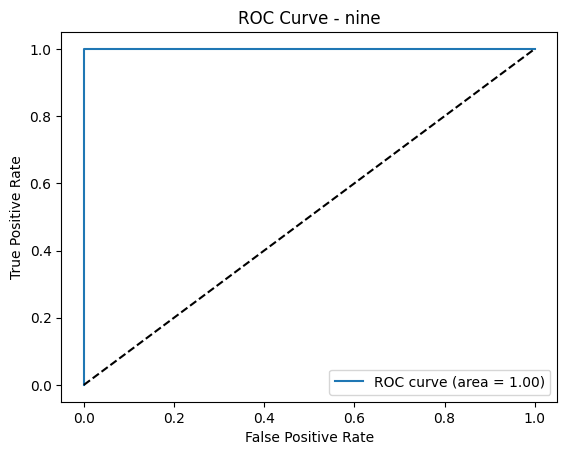

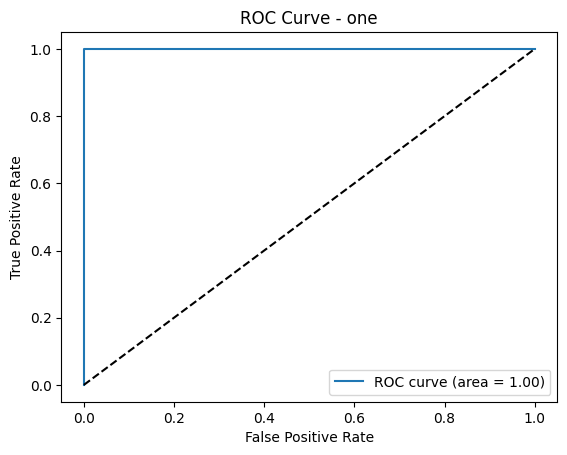

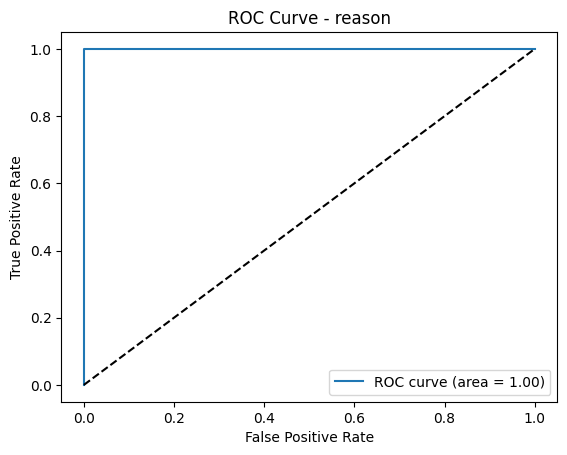

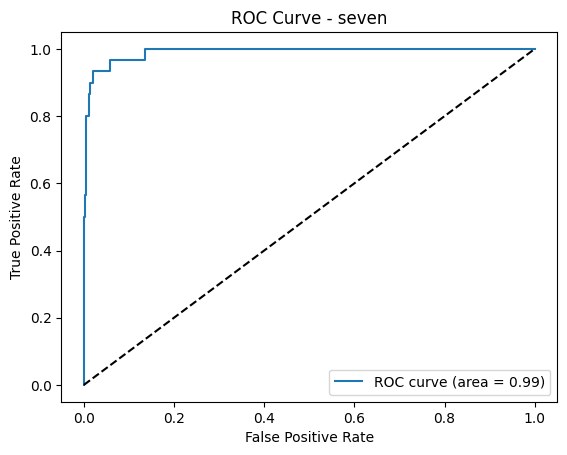

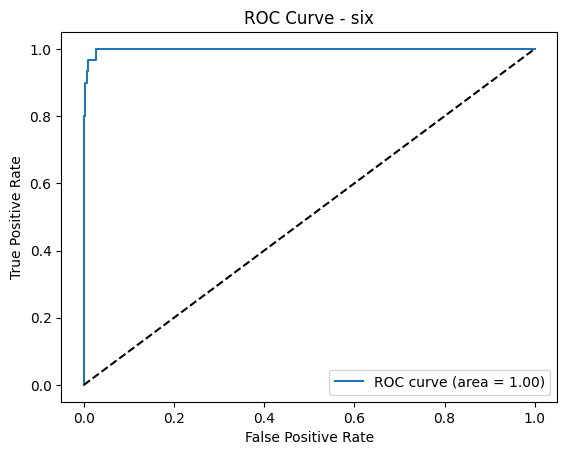

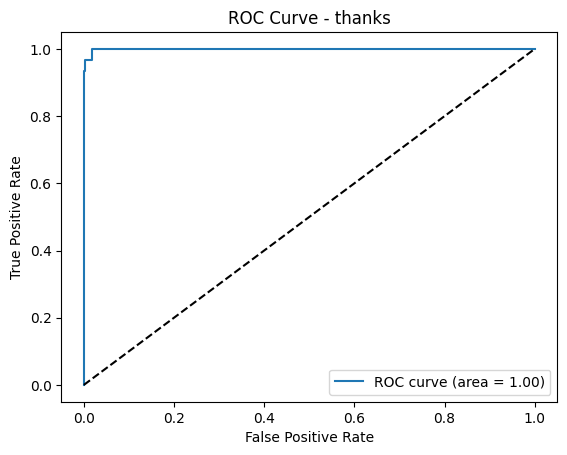

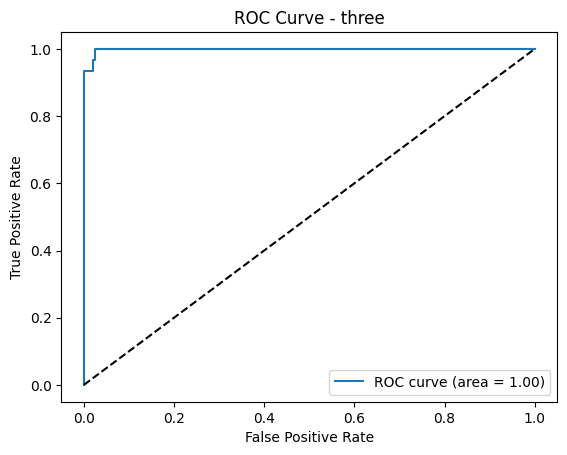

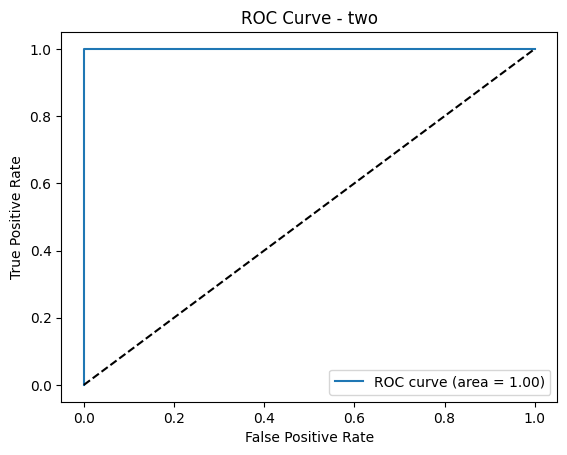

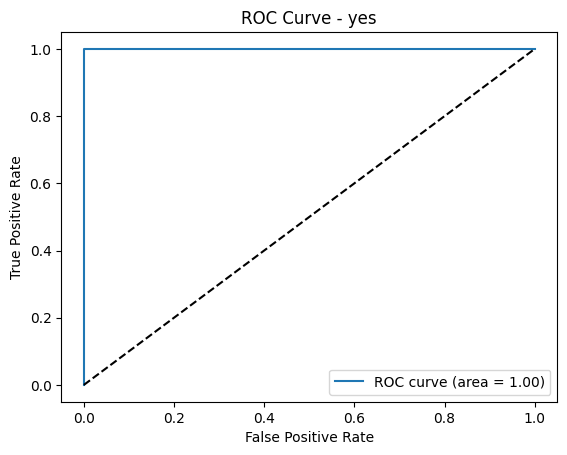

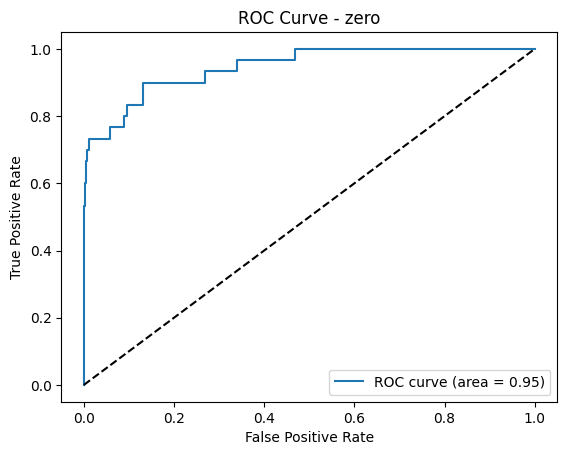

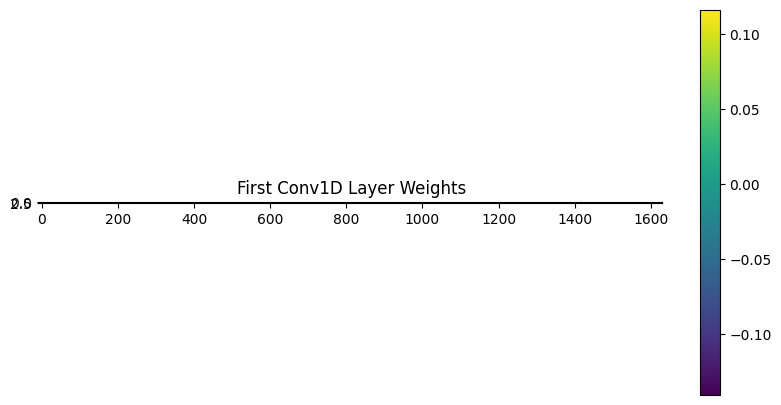

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


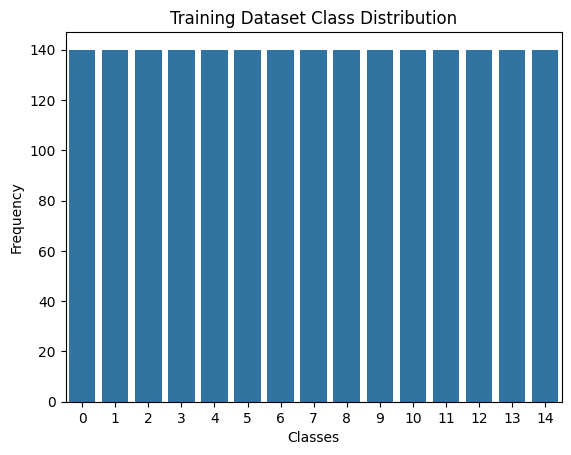

In [8]:

#DULLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL

import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import pandas as pd
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, LSTM, Dense, Dropout, MaxPooling1D,
    BatchNormalization, concatenate
)
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Actions (classes)
actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
early_stopping2 = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1
)

def build_model(hp):
    filters = hp.Choice('filters', [64, 128])
    kernel_1 = hp.Choice('kernel_1', [3, 5])
    kernel_2 = hp.Choice('kernel_2', [3, 7])
    lstm_1   = hp.Choice('lstm_1', [128, 64])
    lstm_2   = hp.Choice('lstm_2', [64, 32])
    
    dropout_conv = hp.Choice('dropout_conv', [0.2, 0.3])
    dropout_lstm = hp.Choice('dropout_lstm', [0.3, 0.4])
    dropout_dense = hp.Choice('dropout_dense', [0.4, 0.5])
    
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4])
    
    input_layer = Input(shape=(30, 1629), name='input_layer')

    convA = Conv1D(filters=filters, kernel_size=kernel_1, activation='relu', padding='same')(input_layer)
    convB = Conv1D(filters=filters, kernel_size=kernel_2, activation='relu', padding='same')(input_layer)
    merged = concatenate([convA, convB], axis=-1)

    x = BatchNormalization()(merged)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(dropout_conv)(x)

    x = Conv1D(filters=filters*2, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(dropout_conv)(x)

    x = LSTM(lstm_1, return_sequences=True, activation='tanh')(x)
    x = Dropout(dropout_lstm)(x)

    x = LSTM(lstm_2, return_sequences=False, activation='tanh')(x)
    x = Dropout(dropout_lstm)(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_dense)(x)

    x = Dense(64, activation='relu')(x)
    output_layer = Dense(len(actions), activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )
    return model

from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_categorical_accuracy',
    max_trials=100,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='sign_language_random_search'
)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[tb_callback, early_stopping, reduce_lr],
    verbose=1
)

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:", best_hp.values)
final_model = tuner.hypermodel.build(best_hp)

import time
start_time = time.time()
history_final = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[tb_callback, early_stopping2, reduce_lr],
    verbose=1
)
end_time = time.time()
training_time = end_time - start_time

final_model.save('tcn_lstm_best_model_tunerxxx.h5')
print("Nihai model kaydedildi: tcn_lstm_best_model_tuner.h5")

# Eğitim süresini kaydet
with open('training_time.txt', 'w') as f:
    f.write(f'Toplam Eğitim Süresi: {training_time:.2f} saniye\n')

# Eğitim geçmişini kaydet
with open('history_final.pkl', 'wb') as file:             
    pickle.dump(history_final.history, file)

# Eğitim doğruluğu ve kayıp grafiklerini çizip kaydet
plt.plot(history_final.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history_final.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')
plt.clf()

plt.plot(history_final.history['loss'], label='Train Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')
plt.clf()

# Confusion Matrix
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=actions)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=actions)
with open('classification_report.txt', 'w') as f:
    f.write(report)

# ROC Curve ve AUC
y_test_bin = label_binarize(y_true, classes=np.arange(len(actions)))
for i, action in enumerate(actions):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {action}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.savefig(f'roc_curve_{action}.png')
    plt.show()

# İlk Conv1D katmanının ağırlık görselleştirmesi
first_conv_layer = final_model.get_layer(index=1)  # İlk Conv1D layer
weights, biases = first_conv_layer.get_weights()
plt.figure(figsize=(10, 5))
plt.imshow(weights[:, :, 0], cmap='viridis')
plt.colorbar()
plt.title('First Conv1D Layer Weights')
plt.savefig('conv1d_weights.png')
plt.show()

# Model özeti kaydet
with open('model_summary.txt', 'w') as f:
    final_model.summary(print_fn=lambda x: f.write(x + '\n'))


# Veri kümesi sınıf dağılımı
class_counts = pd.Series(np.argmax(y_train, axis=1)).value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Training Dataset Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.savefig('class_distribution.png')
plt.show()

# Toplam parametre sayısı
with open('model_parameters.txt', 'w') as f:
    total_params = final_model.count_params()
    f.write(f'Toplam Parametre Sayısı: {total_params}\n')



Trial 100 Complete [00h 00m 25s]
val_categorical_accuracy: 0.9622222185134888

Best val_categorical_accuracy So Far: 0.9733333587646484
Total elapsed time: 00h 42m 32s
Best hyperparameters found: {'filters': 128, 'kernel_1': 5, 'kernel_2': 7, 'lstm_1': 128, 'lstm_2': 32, 'dropout_conv': 0.2, 'dropout_lstm': 0.3, 'dropout_dense': 0.4, 'learning_rate': 0.0001}
Epoch 1/200
66/66 [==============================] - 4s 28ms/step - loss: 2.1523 - categorical_accuracy: 0.4919 - val_loss: 2.6102 - val_categorical_accuracy: 0.1978 - lr: 1.0000e-04
Epoch 2/200
66/66 [==============================] - 1s 16ms/step - loss: 1.5609 - categorical_accuracy: 0.7843 - val_loss: 2.5510 - val_categorical_accuracy: 0.1067 - lr: 1.0000e-04
Epoch 3/200
66/66 [==============================] - 1s 16ms/step - loss: 1.1336 - categorical_accuracy: 0.8676 - val_loss: 2.5003 - val_categorical_accuracy: 0.1311 - lr: 1.0000e-04
Epoch 4/200
66/66 [==============================] - 1s 16ms/step - loss: 0.7898 - categor

<Figure size 640x480 with 0 Axes>

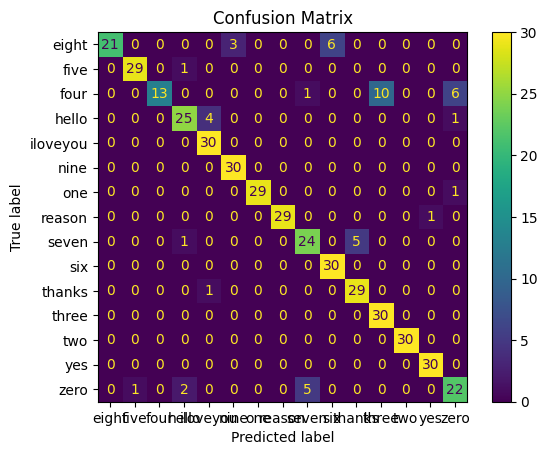

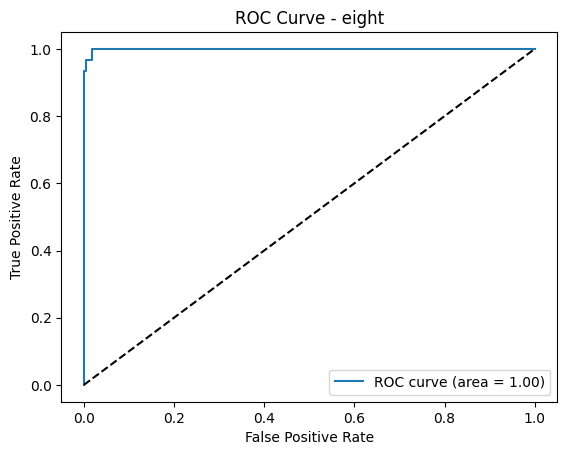

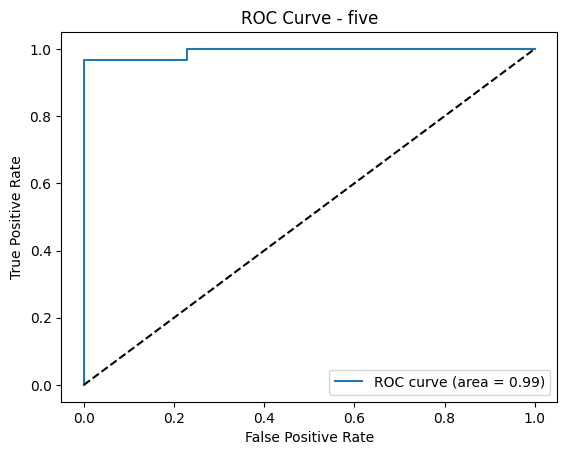

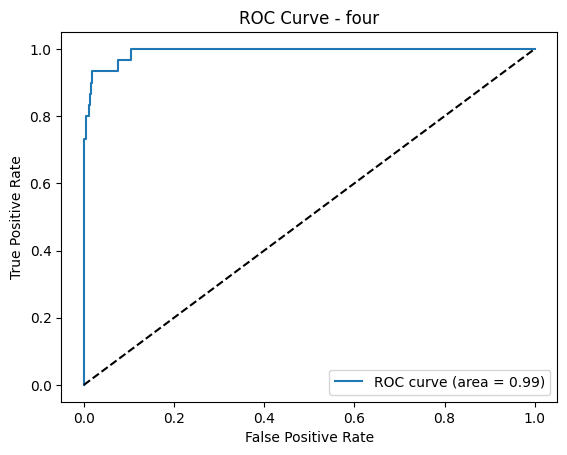

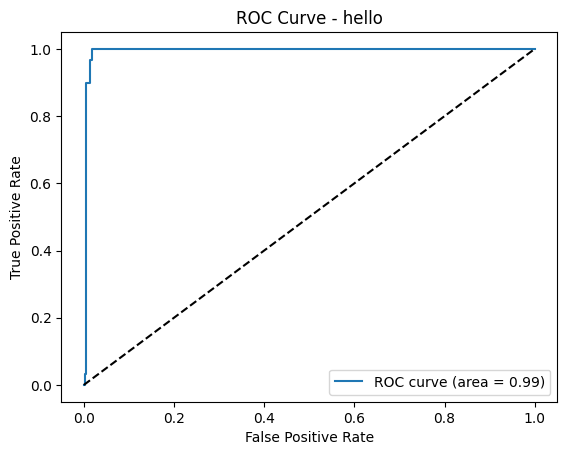

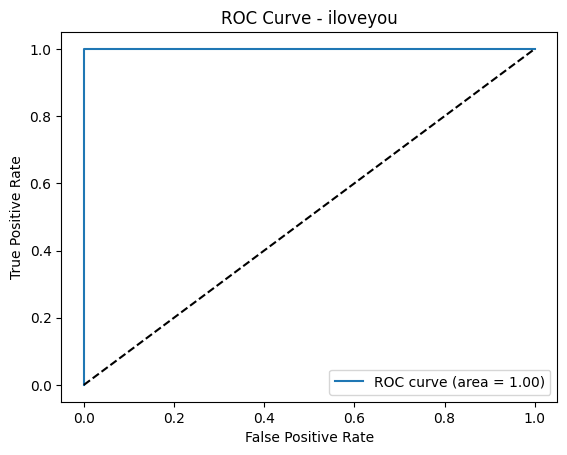

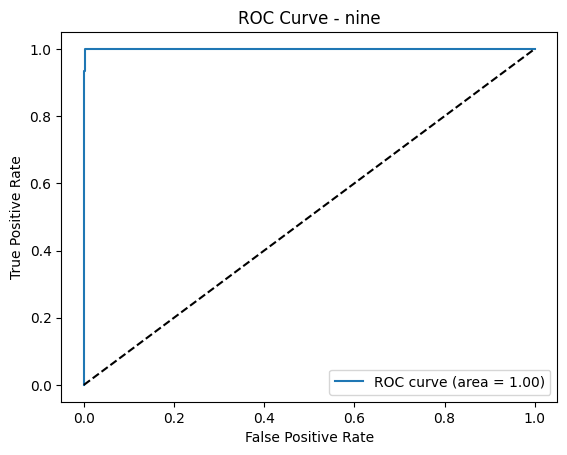

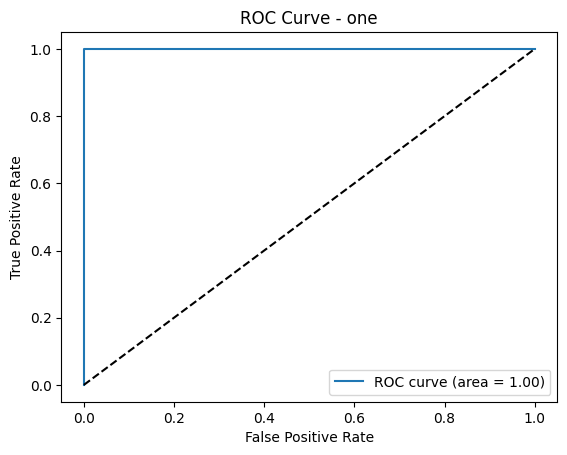

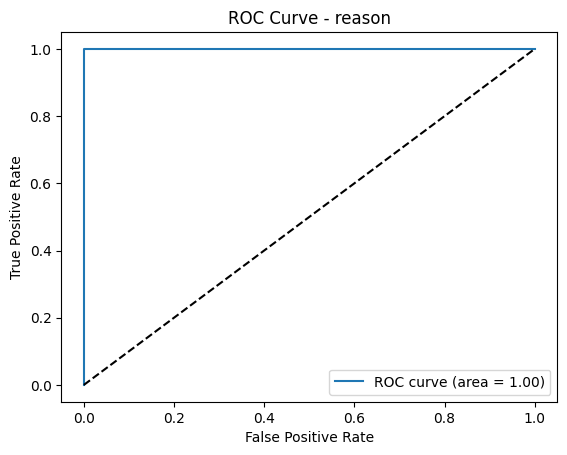

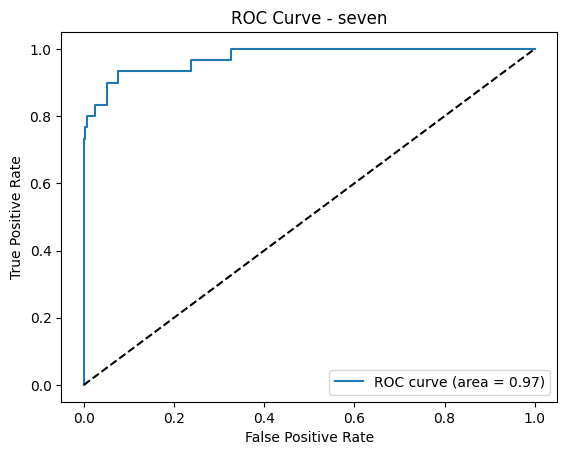

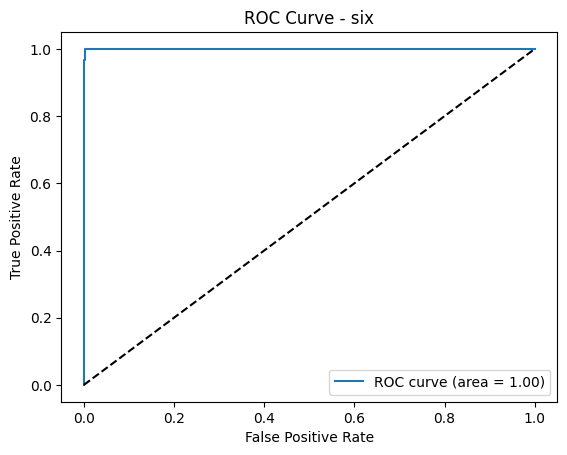

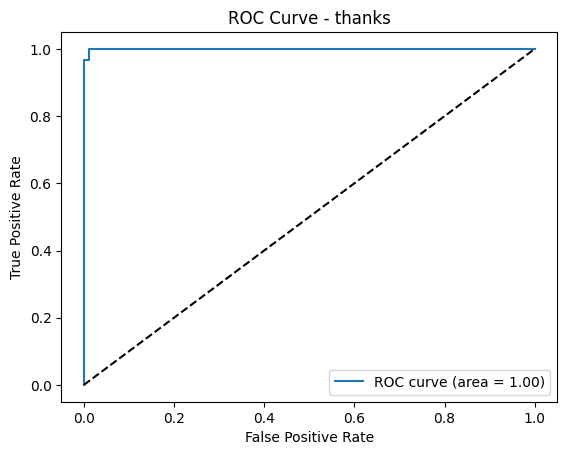

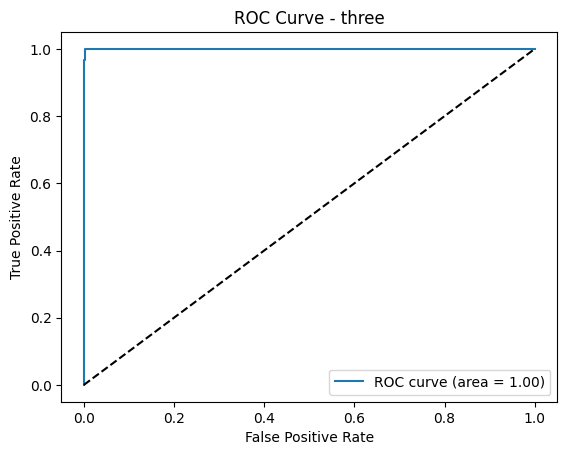

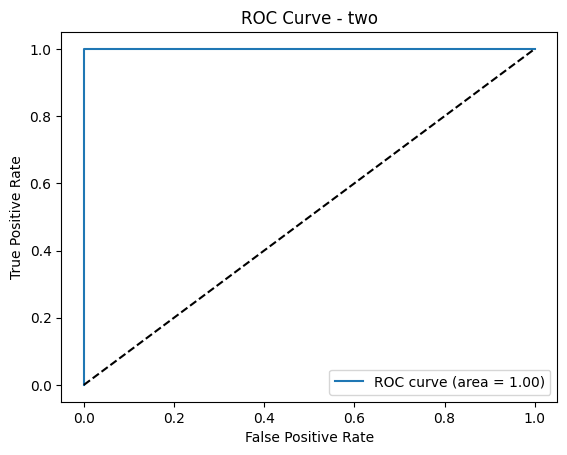

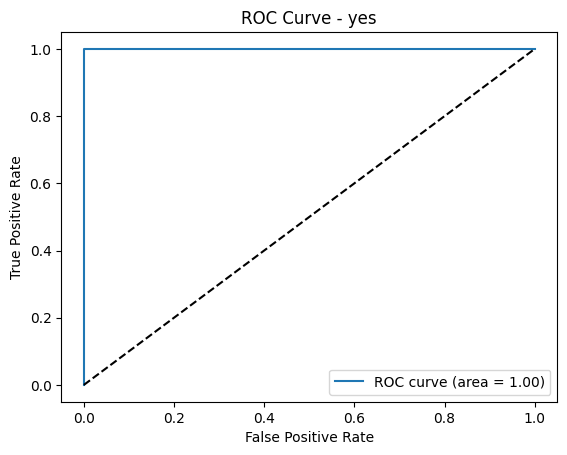

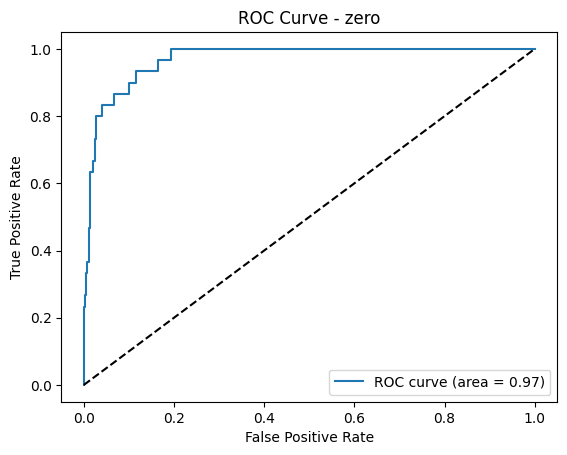

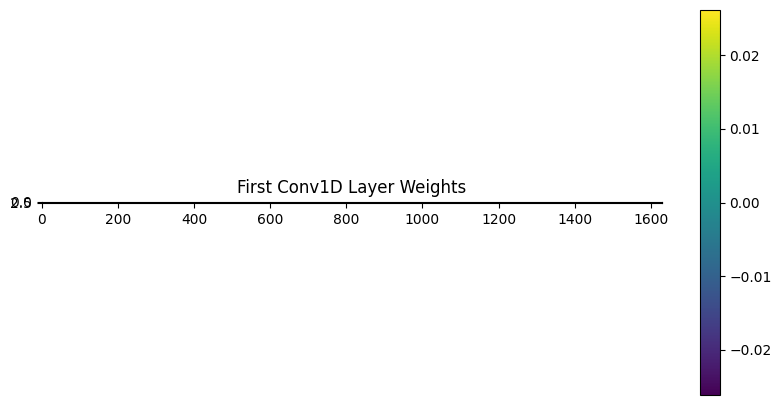

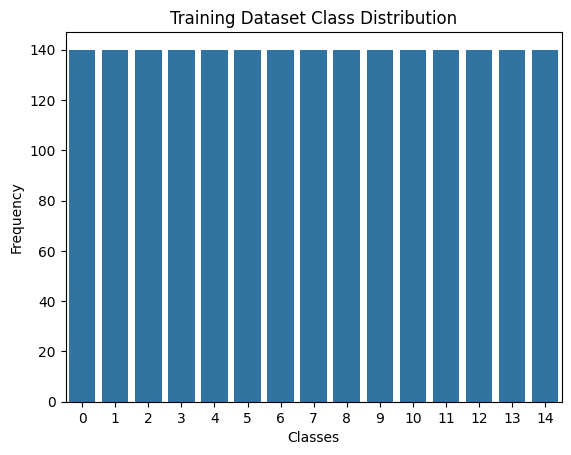

In [4]:

#No Dense

import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import pandas as pd
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, LSTM, Dense, Dropout, MaxPooling1D,
    BatchNormalization, concatenate
)
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Actions (classes)
actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
early_stopping2 = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1
)

def build_model(hp):
    filters = hp.Choice('filters', [64, 128])
    kernel_1 = hp.Choice('kernel_1', [3, 5])
    kernel_2 = hp.Choice('kernel_2', [3, 7])
    lstm_1   = hp.Choice('lstm_1', [128, 64])
    lstm_2   = hp.Choice('lstm_2', [64, 32])
    
    dropout_conv = hp.Choice('dropout_conv', [0.2, 0.3])
    dropout_lstm = hp.Choice('dropout_lstm', [0.3, 0.4])
    dropout_dense = hp.Choice('dropout_dense', [0.4, 0.5])
    
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4])
    
    input_layer = Input(shape=(30, 1629), name='input_layer')

    # Convolutional Layers
    convA = Conv1D(filters=filters, kernel_size=kernel_1, activation='relu', padding='same')(input_layer)
    convB = Conv1D(filters=filters, kernel_size=kernel_2, activation='relu', padding='same')(input_layer)
    merged = concatenate([convA, convB], axis=-1)

    x = BatchNormalization()(merged)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(dropout_conv)(x)

    x = Conv1D(filters=filters*2, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(dropout_conv)(x)

    # LSTM Layers
    x = LSTM(lstm_1, return_sequences=True, activation='tanh')(x)
    x = Dropout(dropout_lstm)(x)

    x = LSTM(lstm_2, return_sequences=False, activation='tanh')(x)
    x = Dropout(dropout_lstm)(x)

    # Output Layer
    output_layer = tf.keras.layers.Dense(len(actions), activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )
    return model

from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_categorical_accuracy',
    max_trials=100,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='sign_language_random_search'
)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[tb_callback, early_stopping, reduce_lr],
    verbose=1
)

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:", best_hp.values)
final_model = tuner.hypermodel.build(best_hp)

import time
start_time = time.time()
history_final = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[tb_callback, early_stopping2, reduce_lr],
    verbose=1
)
end_time = time.time()
training_time = end_time - start_time

final_model.save('dense_no.h5')
print("Nihai model kaydedildi: tcn_lstm_best_model_tuner.h5")

# Eğitim süresini kaydet
with open('training_time.txt', 'w') as f:
    f.write(f'Toplam Eğitim Süresi: {training_time:.2f} saniye\n')

# Eğitim geçmişini kaydet
with open('history_final.pkl', 'wb') as file:             
    pickle.dump(history_final.history, file)

# Eğitim doğruluğu ve kayıp grafiklerini çizip kaydet
plt.plot(history_final.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history_final.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')
plt.clf()

plt.plot(history_final.history['loss'], label='Train Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')
plt.clf()

# Confusion Matrix
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=actions)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=actions)
with open('classification_report.txt', 'w') as f:
    f.write(report)

# ROC Curve ve AUC
y_test_bin = label_binarize(y_true, classes=np.arange(len(actions)))
for i, action in enumerate(actions):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {action}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.savefig(f'roc_curve_{action}.png')
    plt.show()

# İlk Conv1D katmanının ağırlık görselleştirmesi
first_conv_layer = final_model.get_layer(index=1)  # İlk Conv1D layer
weights, biases = first_conv_layer.get_weights()
plt.figure(figsize=(10, 5))
plt.imshow(weights[:, :, 0], cmap='viridis')
plt.colorbar()
plt.title('First Conv1D Layer Weights')
plt.savefig('conv1d_weights.png')
plt.show()

# Model özeti kaydet
with open('model_summary.txt', 'w') as f:
    final_model.summary(print_fn=lambda x: f.write(x + '\n'))


# Veri kümesi sınıf dağılımı
class_counts = pd.Series(np.argmax(y_train, axis=1)).value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Training Dataset Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.savefig('class_distribution.png')
plt.show()

# Toplam parametre sayısı
with open('model_parameters.txt', 'w') as f:
    total_params = final_model.count_params()
    f.write(f'Toplam Parametre Sayısı: {total_params}\n')



In [31]:
#100 video kayıt
import os
import cv2
import mediapipe as mp
import time

# Path for videos
VIDEOS_PATH = os.path.join('videos')

# Ayarlar
fps = 15  # 15 FPS
sequence_length = fps * 2  # 2 saniye (15 FPS * 2 saniye = 30 çerçeve)

# Videolar klasörü oluştur
if not os.path.exists(VIDEOS_PATH):
    os.makedirs(VIDEOS_PATH)

# Mediapipe holistic modeli başlat
mp_holistic = mp.solutions.holistic

# Kamerayı aç
cap = cv2.VideoCapture(0)

# Kamera çözünürlüğü ayarla
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Çözünürlük bilgilerini al
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Kamera çözünürlüğü: {frame_width}x{frame_height}, FPS: {fps}")

# Mediapipe ile çalışmaya başla
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for video_num in range(1, 4):  # 100 video kaydetmek için döngü
        video_path = os.path.join(VIDEOS_PATH, f'video{video_num}.mp4')
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))

        # Geri sayımı kamerada göster
        countdown_start = time.time()
        while time.time() - countdown_start < 5:
            ret, frame = cap.read()
            if not ret:
                print("Kameradan görüntü alınamadı!")
                break

            remaining_time = int(5 - (time.time() - countdown_start))
            cv2.putText(frame, f"Recording starts in {remaining_time}", (50, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.putText(frame, f"Camera FPS: {fps}", (15, 450),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow("Webcam Feed", frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        frame_count = 0

        while frame_count < sequence_length:
            start_frame_time = time.time()

            # Kameradan görüntü al
            ret, frame = cap.read()
            if not ret:
                print("Kameradan görüntü alınamadı!")
                break

            # Mediapipe ile işleme
            image, results = frame, holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Landmarks çiz
            if results.pose_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

            if results.face_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)

            if results.left_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            if results.right_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            # Videoya kaydet
            out.write(frame)
            frame_count += 1

            # Görüntüyü ekranda göster
            cv2.putText(frame, f"Recording video{video_num} ({frame_count}/{sequence_length})", (15, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(frame, f"Camera FPS: {fps}", (15, 450),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow("Webcam Feed", frame)

            # Çerçeve işlem süresini hesapla ve bekleme ekle
            elapsed_time = time.time() - start_frame_time
            delay = max(1 / fps - elapsed_time, 0)
            time.sleep(delay)

            # Çıkış için 'q' tuşuna bas
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        out.release()

cap.release()
cv2.destroyAllWindows()


Kamera çözünürlüğü: 640x480, FPS: 15


In [33]:
import os
import cv2
import numpy as np
import mediapipe as mp

# Paths
VIDEO_DIR = 'videos'  # Videoların bulunduğu klasör
OUTPUT_DIR = 'frames'  # Çıktı klasörü

# Mediapipe Holistic modeli başlat
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Anahtar noktaları çıkarmak için bir yardımcı fonksiyon
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

# Çıktı klasörünü oluştur
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Videoları işle
video_files = [f for f in os.listdir(VIDEO_DIR) if f.endswith('.mp4')]

for video_idx, video_file in enumerate(video_files, start=1):
    video_path = os.path.join(VIDEO_DIR, video_file)
    video_output_dir = os.path.join(OUTPUT_DIR, str(video_idx))
    os.makedirs(video_output_dir, exist_ok=True)

    print(f"İşleniyor: {video_file} -> {video_output_dir}")

    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        cap = cv2.VideoCapture(video_path)
        frame_num = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Mediapipe ile işlem yap
            image, results = frame, holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Anahtar noktaları çıkar
            keypoints = extract_keypoints(results)

            # İlk 30 frame'i işle
            if frame_num < 30:
                npy_name = f"frame{frame_num}.npy"
                npy_path = os.path.join(video_output_dir, npy_name)
                np.save(npy_path, keypoints)
                frame_num += 1
            else:
                break

        cap.release()
        print(f"{frame_num} frame işlendi ve {video_output_dir} içine kaydedildi.")

print("Tüm videolar başarıyla işlendi.")


İşleniyor: video1.mp4 -> frames\1
30 frame işlendi ve frames\1 içine kaydedildi.
İşleniyor: video2.mp4 -> frames\2
30 frame işlendi ve frames\2 içine kaydedildi.
İşleniyor: video3.mp4 -> frames\3
30 frame işlendi ve frames\3 içine kaydedildi.
Tüm videolar başarıyla işlendi.


In [3]:
import os
import numpy as np
import tensorflow as tf

# Model ve Frame Klasörü
MODEL_PATH = "tcn_lstm_optimized.h5"  # Model dosyasının yolu
FRAMES_PATH = "frames"     # Frame'lerin bulunduğu ana klasör
actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]

# Modeli yükle
model = tf.keras.models.load_model(MODEL_PATH)
print(f"Model '{MODEL_PATH}' başarıyla yüklendi!")

# Her bir video klasörünü sırayla işle
video_folders = sorted(os.listdir(FRAMES_PATH))  # Örn. 'frames/1', 'frames/2', ...
results = {}

for video_folder in video_folders:
    video_path = os.path.join(FRAMES_PATH, video_folder)
    if not os.path.isdir(video_path):
        continue

    # Frame dosyalarını sırayla al
    frame_files = sorted([f for f in os.listdir(video_path) if f.endswith('.npy')])
    if not frame_files:
        print(f"{video_folder} klasöründe frame bulunamadı!")
        continue

    print(f"{video_folder} için {len(frame_files)} frame bulundu. Tahminler yapılıyor...")

    # Tüm frame'ler için tahmin yap
    sequence = []
    for frame_file in frame_files:
        frame_path = os.path.join(video_path, frame_file)
        keypoints = np.load(frame_path)  # Frame'i yükle
        sequence.append(keypoints)

    sequence = np.expand_dims(sequence, axis=0)  # Modelin beklediği şekle getirilir (1, 30, feature_dim)

    # Model tahmini
    predictions = model.predict(sequence)[0]
    predicted_class = np.argmax(predictions)
    confidence = predictions[predicted_class]

    # Sonuçları sakla
    results[video_folder] = {
        "predicted_class": actions[predicted_class],
        "confidence": confidence
    }

    print(f"{video_folder} Tahmin: {actions[predicted_class]} | Güven: {confidence:.2f}")

# Sonuçları özetle
print("\nToplu Sonuçlar:")
for video_folder, result in results.items():
    print(f"{video_folder} -> Tahmin: {result['predicted_class']} | Güven: {result['confidence']:.2f}")


Model 'tcn_lstm_optimized.h5' başarıyla yüklendi!
1 için 30 frame bulundu. Tahminler yapılıyor...
1 Tahmin: nine | Güven: 1.00
2 için 30 frame bulundu. Tahminler yapılıyor...
2 Tahmin: zero | Güven: 1.00
3 için 30 frame bulundu. Tahminler yapılıyor...
3 Tahmin: nine | Güven: 1.00

Toplu Sonuçlar:
1 -> Tahmin: nine | Güven: 1.00
2 -> Tahmin: zero | Güven: 1.00
3 -> Tahmin: nine | Güven: 1.00


In [6]:
import os
import numpy as np
import tensorflow as tf



# Model ve Klasör Yolları
MODEL_PATH = "dense_no.h5"  # Model dosyasının yolu
FRAMES_PATH = "test"  # Ana klasör yolu
actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]

# Modeli yükle
model = tf.keras.models.load_model(MODEL_PATH)
print(f"Model '{MODEL_PATH}' başarıyla yüklendi!")

# Tüm label klasörlerini sırayla işle
label_folders = sorted(os.listdir(FRAMES_PATH))  # 'test/eight', 'test/five', ...
results = {}
accuracies = []

for label_folder in label_folders:
    label_path = os.path.join(FRAMES_PATH, label_folder)
    if not os.path.isdir(label_path):
        continue

    correct_count = 0  # Doğru tahmin sayacı
    total_count = 0  # Toplam tahmin sayacı

    # Her bir alt klasörü sırayla işle (1, 2, 3 ...)
    subfolders = sorted(os.listdir(label_path))  # 'test/eight/1', 'test/eight/2', ...
    for subfolder in subfolders:
        subfolder_path = os.path.join(label_path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue

        # Frame dosyalarını sırayla al
        frame_files = sorted([f for f in os.listdir(subfolder_path) if f.endswith('.npy')])
        if not frame_files:
            print(f"{subfolder_path} klasöründe frame bulunamadı!")
            continue

        print(f"{subfolder_path} için {len(frame_files)} frame bulundu. Tahminler yapılıyor...")

        # Tüm frame'ler için tahmin yap
        sequence = []
        for frame_file in frame_files:
            frame_path = os.path.join(subfolder_path, frame_file)
            keypoints = np.load(frame_path)  # Frame'i yükle
            sequence.append(keypoints)

        sequence = np.expand_dims(sequence, axis=0)  # Modelin beklediği şekle getirilir (1, 30, feature_dim)

        # Model tahmini
        predictions = model.predict(sequence, verbose=0)[0]
        predicted_class = np.argmax(predictions)
        confidence = predictions[predicted_class]

        # Doğru tahmin kontrolü
        is_correct = actions[predicted_class] == label_folder
        if is_correct:
            correct_count += 1
        total_count += 1

        # Sonuçları sakla
        results[f"{label_folder}/{subfolder}"] = {
            "predicted_class": actions[predicted_class],
            "confidence": confidence
        }

        print(f"{label_folder}/{subfolder} Tahmin: {actions[predicted_class]} | Güven: {confidence:.2f}")

    # Accuracy hesapla
    accuracy = correct_count / total_count if total_count > 0 else 0
    accuracies.append({"label": label_folder, "accuracy": accuracy})

# Sonuçları özetle
print("\nToplu Sonuçlar:")
for video_folder, result in results.items():
    print(f"{video_folder} -> Tahmin: {result['predicted_class']} | Güven: {result['confidence']:.2f}")

# Accuracy sonuçlarını toplu yazdır
print("\nAccuracy Sonuçları:")
for accuracy_result in accuracies:
    print(f"{accuracy_result['label']} Accuracy: {accuracy_result['accuracy']:.2f}")


Model 'dense_no.h5' başarıyla yüklendi!
test\eight\1 için 30 frame bulundu. Tahminler yapılıyor...
eight/1 Tahmin: zero | Güven: 0.35
test\eight\2 için 30 frame bulundu. Tahminler yapılıyor...
eight/2 Tahmin: nine | Güven: 0.38
test\eight\3 için 30 frame bulundu. Tahminler yapılıyor...
eight/3 Tahmin: six | Güven: 0.35
test\five\1 için 30 frame bulundu. Tahminler yapılıyor...
five/1 Tahmin: five | Güven: 0.94
test\five\2 için 30 frame bulundu. Tahminler yapılıyor...
five/2 Tahmin: yes | Güven: 0.28
test\five\3 için 30 frame bulundu. Tahminler yapılıyor...
five/3 Tahmin: five | Güven: 0.43
test\four\1 için 30 frame bulundu. Tahminler yapılıyor...
four/1 Tahmin: zero | Güven: 0.34
test\four\2 için 30 frame bulundu. Tahminler yapılıyor...
four/2 Tahmin: nine | Güven: 0.20
test\four\3 için 30 frame bulundu. Tahminler yapılıyor...
four/3 Tahmin: nine | Güven: 0.27
test\hello\1 için 30 frame bulundu. Tahminler yapılıyor...
hello/1 Tahmin: nine | Güven: 0.56
test\hello\2 için 30 frame bulundu

In [14]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf

mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]
colors = [
    (245, 117, 16),
    (117, 245, 16),
    (16, 117, 245),
    (0, 128, 255),
    (128, 0, 128),
    (255, 255, 0),
    (0, 255, 255),
    (255, 0, 255),
    (0, 165, 255),
    (128, 128, 0),
    (255, 192, 203),
    (60, 179, 113),
    (230, 230, 250),
    (188, 143, 143),
    (255, 69, 0)
]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(
            output_frame, 
            (0, 60 + num * 40), 
            (int(prob * 100), 90 + num * 40),
            colors[num], 
            -1
        )
        cv2.putText(
            output_frame, actions[num], 
            (0, 85 + num * 40), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            1, (255, 255, 255), 2, cv2.LINE_AA
        )
    return output_frame

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] 
                     for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] 
                     for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] 
                   for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] 
                   for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # RGB -> BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Face
    mp_drawing.draw_landmarks(
        image, 
        results.face_landmarks, 
        mp_face_mesh.FACEMESH_TESSELATION,
        mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
    )
    # Pose
    mp_drawing.draw_landmarks(
        image, 
        results.pose_landmarks, 
        mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
    )
    # Left Hand
    mp_drawing.draw_landmarks(
        image, 
        results.left_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
    )
    # Right Hand
    mp_drawing.draw_landmarks(
        image, 
        results.right_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )

# 1. Değişkenler
sequence = []
sentence = []
predictions = []
threshold = 0.5

# Son tahmin sonuçlarını tutmak için
last_res = None  

model = tf.keras.models.load_model("tcn_lstm_best_model_tunerxxx.h5")

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FPS, 15)  # FPS'i 15'e sabitleme isteği

frame_count = 0

with mp_holistic.Holistic(
    min_detection_confidence=0.5, 
    min_tracking_confidence=0.5
) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1

        # Mediapipe işlemleri
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Keypoint çıkarma
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # son 30 frame

        # *** Tahmin kısmı: Sadece her 30. framede yapıyoruz ***
        if len(sequence) == 30 and frame_count % 30 == 0:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            last_res = res  # Son tahmini sakla
            print(actions[np.argmax(res)])

            predictions.append(np.argmax(res))

            # Son 10 tahminin içinde en sık tekrar eden de bu tahmin ise
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            # Sadece 5 tane kelimeyi sakla
            if len(sentence) > 5:
                sentence = sentence[-5:]
        # -----------------------------------------------

        # *** Her framede (tahmin olsa da olmasa da) ekrana son sonucu çiziyoruz ***
        if last_res is not None:
            image = prob_viz(last_res, actions, image, colors)

        # Üst kısımdaki dikdörtgen ve cümle
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(
            image, ' '.join(sentence), 
            (3, 30), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            1, (255, 255, 255), 2, cv2.LINE_AA
        )

        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


thanks
thanks
thanks
zero
zero
zero
zero
five
five
five
five
five
five
thanks
zero
zero
zero
zero
nine
nine
nine
nine
zero
zero
five
zero
nine
zero
zero
zero
zero
zero
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
nine
six
nine
thanks
thanks
six
six
nine
nine
six
six
six
nine
nine
nine
nine
nine
nine
nine
nine
nine
nine
six
nine
nine
six
six
six
six
five
five
five
five
thanks
thanks
thanks
thanks
thanks
six
six
six
six
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
nine
nine
nine
nine
nine
nine
nine
nine
nine
nine
thanks
thanks
six
six
six
six
eight
eight
eight
eight
nine
thanks
thanks
thanks
nine
nine
thanks
nine
nine
nine
thanks
thanks
thanks
thanks
nine
nine
nine
nine
six
six
six
eight
nine
three
nine
nine
nine
nine
thanks
thanks
nine
three
nine
nine
nine
nine
six
three
thanks
thanks
thanks
reason
reason
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
reason
reason
reason
nine
reason
reason
reason
reason
rea

In [ ]:
cap.release()
cv2.destroyAllWindows()



Model başarıyla yüklendi!


=== Validation Set Evaluation ===
15/15 [==============================] - 1s 15ms/step - loss: 0.2287 - categorical_accuracy: 0.9733
Validation Loss: 0.2287, Validation Accuracy: 0.9733


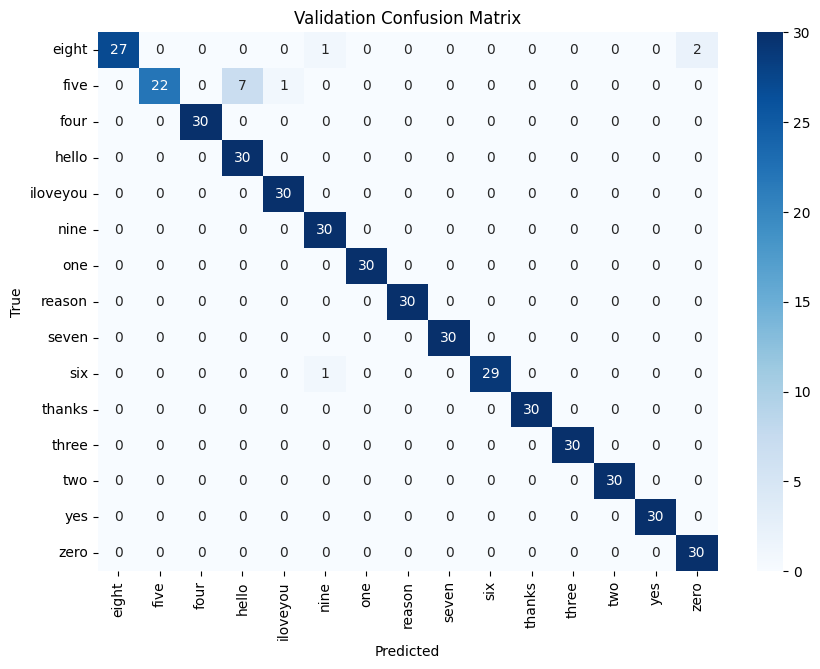

Validation Precision: 0.9769
Validation Recall: 0.9733
Validation F1-Score: 0.9727

Validation Classification Report:
              precision    recall  f1-score   support

       eight       1.00      0.90      0.95        30
        five       1.00      0.73      0.85        30
        four       1.00      1.00      1.00        30
       hello       0.81      1.00      0.90        30
    iloveyou       0.97      1.00      0.98        30
        nine       0.94      1.00      0.97        30
         one       1.00      1.00      1.00        30
      reason       1.00      1.00      1.00        30
       seven       1.00      1.00      1.00        30
         six       1.00      0.97      0.98        30
      thanks       1.00      1.00      1.00        30
       three       1.00      1.00      1.00        30
         two       1.00      1.00      1.00        30
         yes       1.00      1.00      1.00        30
        zero       0.94      1.00      0.97        30

    accuracy    

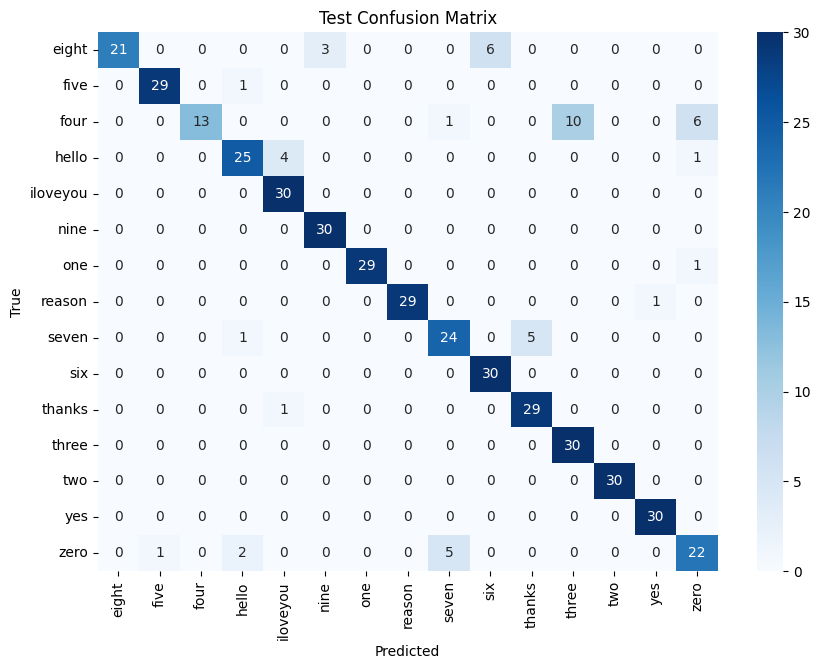

Test Precision: 0.9022
Test Recall: 0.8911
Test F1-Score: 0.8849

Test Classification Report:
              precision    recall  f1-score   support

       eight       1.00      0.70      0.82        30
        five       0.97      0.97      0.97        30
        four       1.00      0.43      0.60        30
       hello       0.86      0.83      0.85        30
    iloveyou       0.86      1.00      0.92        30
        nine       0.91      1.00      0.95        30
         one       1.00      0.97      0.98        30
      reason       1.00      0.97      0.98        30
       seven       0.80      0.80      0.80        30
         six       0.83      1.00      0.91        30
      thanks       0.85      0.97      0.91        30
       three       0.75      1.00      0.86        30
         two       1.00      1.00      1.00        30
         yes       0.97      1.00      0.98        30
        zero       0.73      0.73      0.73        30

    accuracy                           0

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score
import tensorflow as tf

# ================ Modeli Yükleme ================
model = tf.keras.models.load_model("dense_no.h5")
print("\nModel başarıyla yüklendi!\n")

# ================ Evaluation Function ================
def evaluate_model(model, X, y, dataset_name="Test"):
    """
    Modelin performansını değerlendirmek için metrikler hesaplar.
    """
    print(f"\n=== {dataset_name} Set Evaluation ===")
    # Loss ve Accuracy hesaplama
    loss, accuracy = model.evaluate(X, y, verbose=1)
    print(f"{dataset_name} Loss: {loss:.4f}, {dataset_name} Accuracy: {accuracy:.4f}")
    
    # Tahminler
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y, axis=1)

    # Karışıklık Matrisi
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=actions, yticklabels=actions, cmap="Blues")
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Precision, Recall, F1-Score
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    print(f"{dataset_name} Precision: {precision:.4f}")
    print(f"{dataset_name} Recall: {recall:.4f}")
    print(f"{dataset_name} F1-Score: {f1:.4f}")

    # Classification Report
    print(f"\n{dataset_name} Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=actions))
    
    # ROC-AUC (Opsiyonel)
    try:
        roc_auc = roc_auc_score(y, y_pred, multi_class='ovr')
        print(f"{dataset_name} ROC-AUC Score: {roc_auc:.4f}")
    except Exception as e:
        print(f"{dataset_name} ROC-AUC hesaplanamadı: {e}")

# ================ Validation Set Evaluation ================
evaluate_model(model, X_val, y_val, dataset_name="Validation")

# ================ Test Set Evaluation ================
evaluate_model(model, X_test, y_test, dataset_name="Test")
